In [1]:
import pandas as pd
import numpy as np
titanic_tr=pd.read_csv('titanic_train.csv')
titanic_tst=pd.read_csv('titanic_test.csv')

In [2]:
titanic_tr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
col_list=['Survived', 'Sex', 'Age','Fare']
tr_df=titanic_tr[col_list]
len(tr_df)
#tst_df=titanic_tst[col_list]

891

<AxesSubplot:>

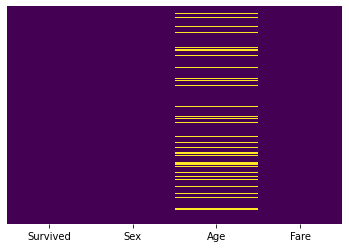

In [6]:
import seaborn as sns
sns.heatmap(tr_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
tr_df['Age'].isnull().sum()


177

In [13]:
data1=tr_df.copy()
data2=data1.groupby(['Sex']).count()
data2

,Survived,Age,Fare
Sex,,,
female,314,261,314
male,577,453,577


In [31]:
sex_ser=pd.Series(tr_df["Sex"])
Age_ser=pd.Series(tr_df['Age'])
sex_ser

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [32]:
Age_ser.isnull().sum()

53

In [22]:
boldata=Age_ser.isnull()
boldata[0]

False

In [25]:
#calculating the average age of Male and female
count_male=0
count_female=0
sum_male=0
sum_female=0
for i in range(len(sex_ser)):
    if(sex_ser[i]=='male'):
        if(boldata[i] == False):
            count_male=count_male+1
            sum_male=sum_male+Age_ser[i]
    else:
        if(boldata[i] == False):
            count_female=count_female+1
            sum_female=sum_female+Age_ser[i]
print(count_male)
print(count_female)
print(sum_male)
print(sum_female)         

453
261
13919.17
7286.0


In [28]:
Avg_age_male=sum_male/count_male
Avg_age_female=sum_female/count_female
print(Avg_age_male)
print(Avg_age_female)

30.72664459161148
27.915708812260537


In [33]:
boldata

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [34]:
for i in range(len(sex_ser)):
    if(sex_ser[i]=='male'):
        if(boldata[i] == True):
            print(i)
            Age_ser[i]=Avg_age_male
    else:
        
        if(boldata[i] == True):
            print(i)
            Age_ser[i]=Avg_age_female

5
17
19
26
28
29
31
32
36
42
45
46
47
48
55
64
65
76
77
82
87
95
101
107
109
121
126
128
140
154
158
159
166
168
176
180
181
185
186
196
198
201
214
223
229
235
240
241
250
256
260
264
270
274
277
284
295
298
300
301
303
304
306
324
330
334
335
347
351
354
358
359
364
367
368
375
384
388
409
410
411
413
415
420
425
428
431
444
451
454
457
459
464
466
468
470
475
481
485
490
495
497
502
507
511
517
522
524
527
531
533
538
547
552
557
560
563
564
568
573
578
584
589
593
596
598
601
602
611
612
613
629
633
639
643
648
650
653
656
667
669
674
680
692
697
709
711
718
727
732
738
739
740
760
766
768
773
776
778
783
790
792
793
815
825
826
828
832
837
839
846
849
859
863
868
878
888


In [35]:
Age_ser.isnull().sum()

0

In [36]:
tr_df['Age']=Age_ser
tr_df['Age']

G:\ANACONDA_INSTALLATION\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      22.000000
1      27.915709
2      27.915709
3      27.915709
4      35.000000
         ...    
886    27.000000
887    27.915709
888    27.915709
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [37]:
tr_df['Age'].isnull().sum()

0

In [38]:
tr_df.head()

,Survived,Sex,Age,Fare
0,0,male,22.000000,7.2500
1,1,female,27.915709,71.2833
2,1,female,27.915709,7.9250
3,1,female,27.915709,53.1000
4,0,male,35.000000,8.0500


In [41]:
#LABEL ENCODER FOR CONVERTING NON NUMBERIC CATEGORICAL FEATURE TO NUMERIC DATA
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
tr_df['Sex']=le.fit_transform(tr_df['Sex'])

G:\ANACONDA_INSTALLATION\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
tr_df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_minmax=pd.DataFrame(scaler.fit_transform(tr_df),columns=tr_df.columns)
data_minmax.head()


G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Survived,Sex,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.345510,0.139136
2,1.0,0.0,0.345510,0.015469
3,1.0,0.0,0.345510,0.103644
4,0.0,1.0,0.434531,0.015713


In [46]:
from sklearn.model_selection import train_test_split
xtrain,x_test,y_train,y_test=train_test_split(data_minmax,data_minmax['Survived'],test_size=0.3,random_state=0)

In [48]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(xtrain,y_train)

G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
y_predicted=model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

1.0

In [51]:
model=SVC(kernel='linear')
model.fit(xtrain,y_train)
y_predicted=model.predict(x_test)
accuracy_score(y_test,y_predicted)

1.0

In [52]:
y_predicted

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0.

In [62]:
import matplotlib.pyplot  as plt 
plt.scatter(y_test)
plt.scatter(y_predicted)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'